# Lectures 02 & 03: Gradient Descent and Backpropagation

# Problem Statement
Find a point in $\mathbb{R}^{2}$ with the least Average Eculidean Distance to a set of arbitary points

# Visualize the problem

In [2]:
from random import Random
def generate_random_points(N=1000):
    SEED = 5
    random_obj = Random(x=SEED)
    return [random_obj.uniform(a=0,b=1) for _ in range(N)],[random_obj.uniform(a=0,b=1) for _ in range(N)]

list_x, list_y = generate_random_points()
print(list_x [:10])
print (list_y[:10])


[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]
[0.8713187027692235, 0.039767712548386625, 0.5888551653281111, 0.11745374212114823, 0.721120830858009, 0.6113236281477744, 0.6120458139259322, 0.22152129960368494, 0.9490212551961823, 0.11102495123278444]


C:\Users\nouran\AppData\Local\Temp\ipykernel_8836\2954566839.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


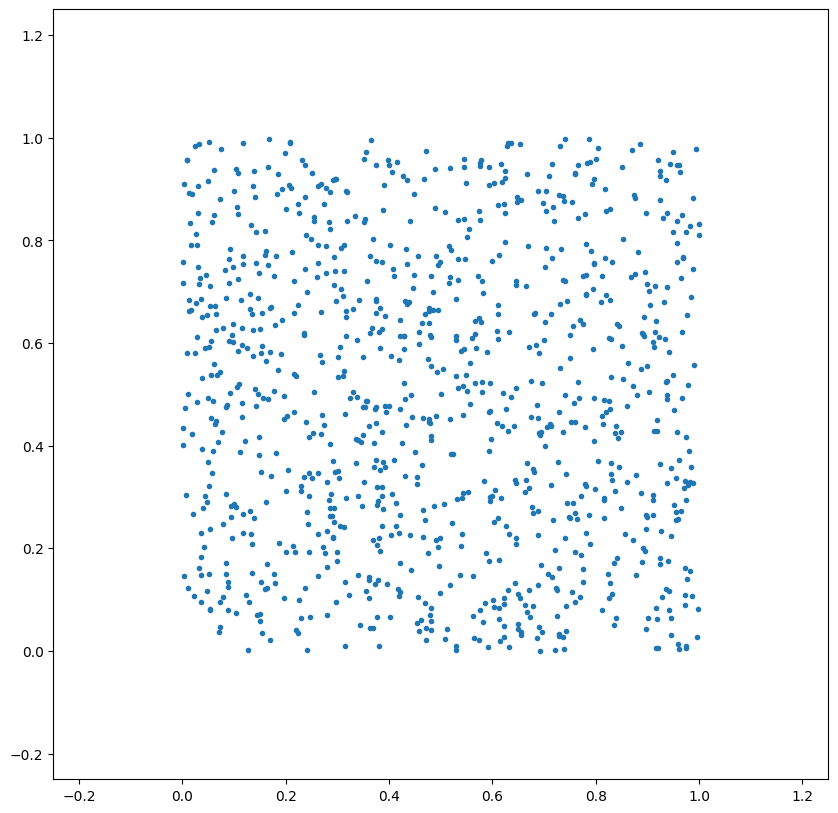

In [3]:
from matplotlib.pyplot import figure
fig = figure(figsize =(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=list_x, y= list_y, marker = ".")
ax.set_xlim (left = -0.25, right = 1.25)
ax.set_ylim (top = 1.25, bottom = -0.25)
fig.show()


# The Loss Function 
Let:
- The solution: ($x_{p}$, $y_{p}$)
- The dataset $\mathbb{D}$ is a {($x_{i}$, $y_{i}$)} of size $\mathbb{N}$
- $\mathbb{L}$ be the loss function and the solution be $$ (x_{p}, y_{p}) = argmin (\mathbb{L}) $$ 
<br>
where $ \mathbb{L} = \frac{1}{N} \sum_{i=0}^{N-1}[(x_{i} - x_{p})^{2} + (y_{i} - y_{p})^{2}]^{\frac{1}{2}} $

In [4]:
from math import sqrt
def loss_at_one_point(x_p, y_p, x_i, y_i):
    return (1/len(x_i))*(sum([sqrt((x_p - x_i)**2+(y_p - y_i)**2) for x_i, y_i in zip(x_i, y_i)]))

In [5]:
STEP = 0.01
MESH_SIZE = 300
x_axis_mesh = [-1+i*STEP for i in range(MESH_SIZE)]
y_axis_mesh = [-1+i*STEP for i in range(MESH_SIZE)]
loss_mesh_z_axis = [
    [loss_at_one_point(x_axis_mesh[i], y_axis_mesh[j], list_x, list_y) for i in range(MESH_SIZE)]
    for j in range(MESH_SIZE)
]

C:\Users\nouran\AppData\Local\Temp\ipykernel_8836\436216769.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


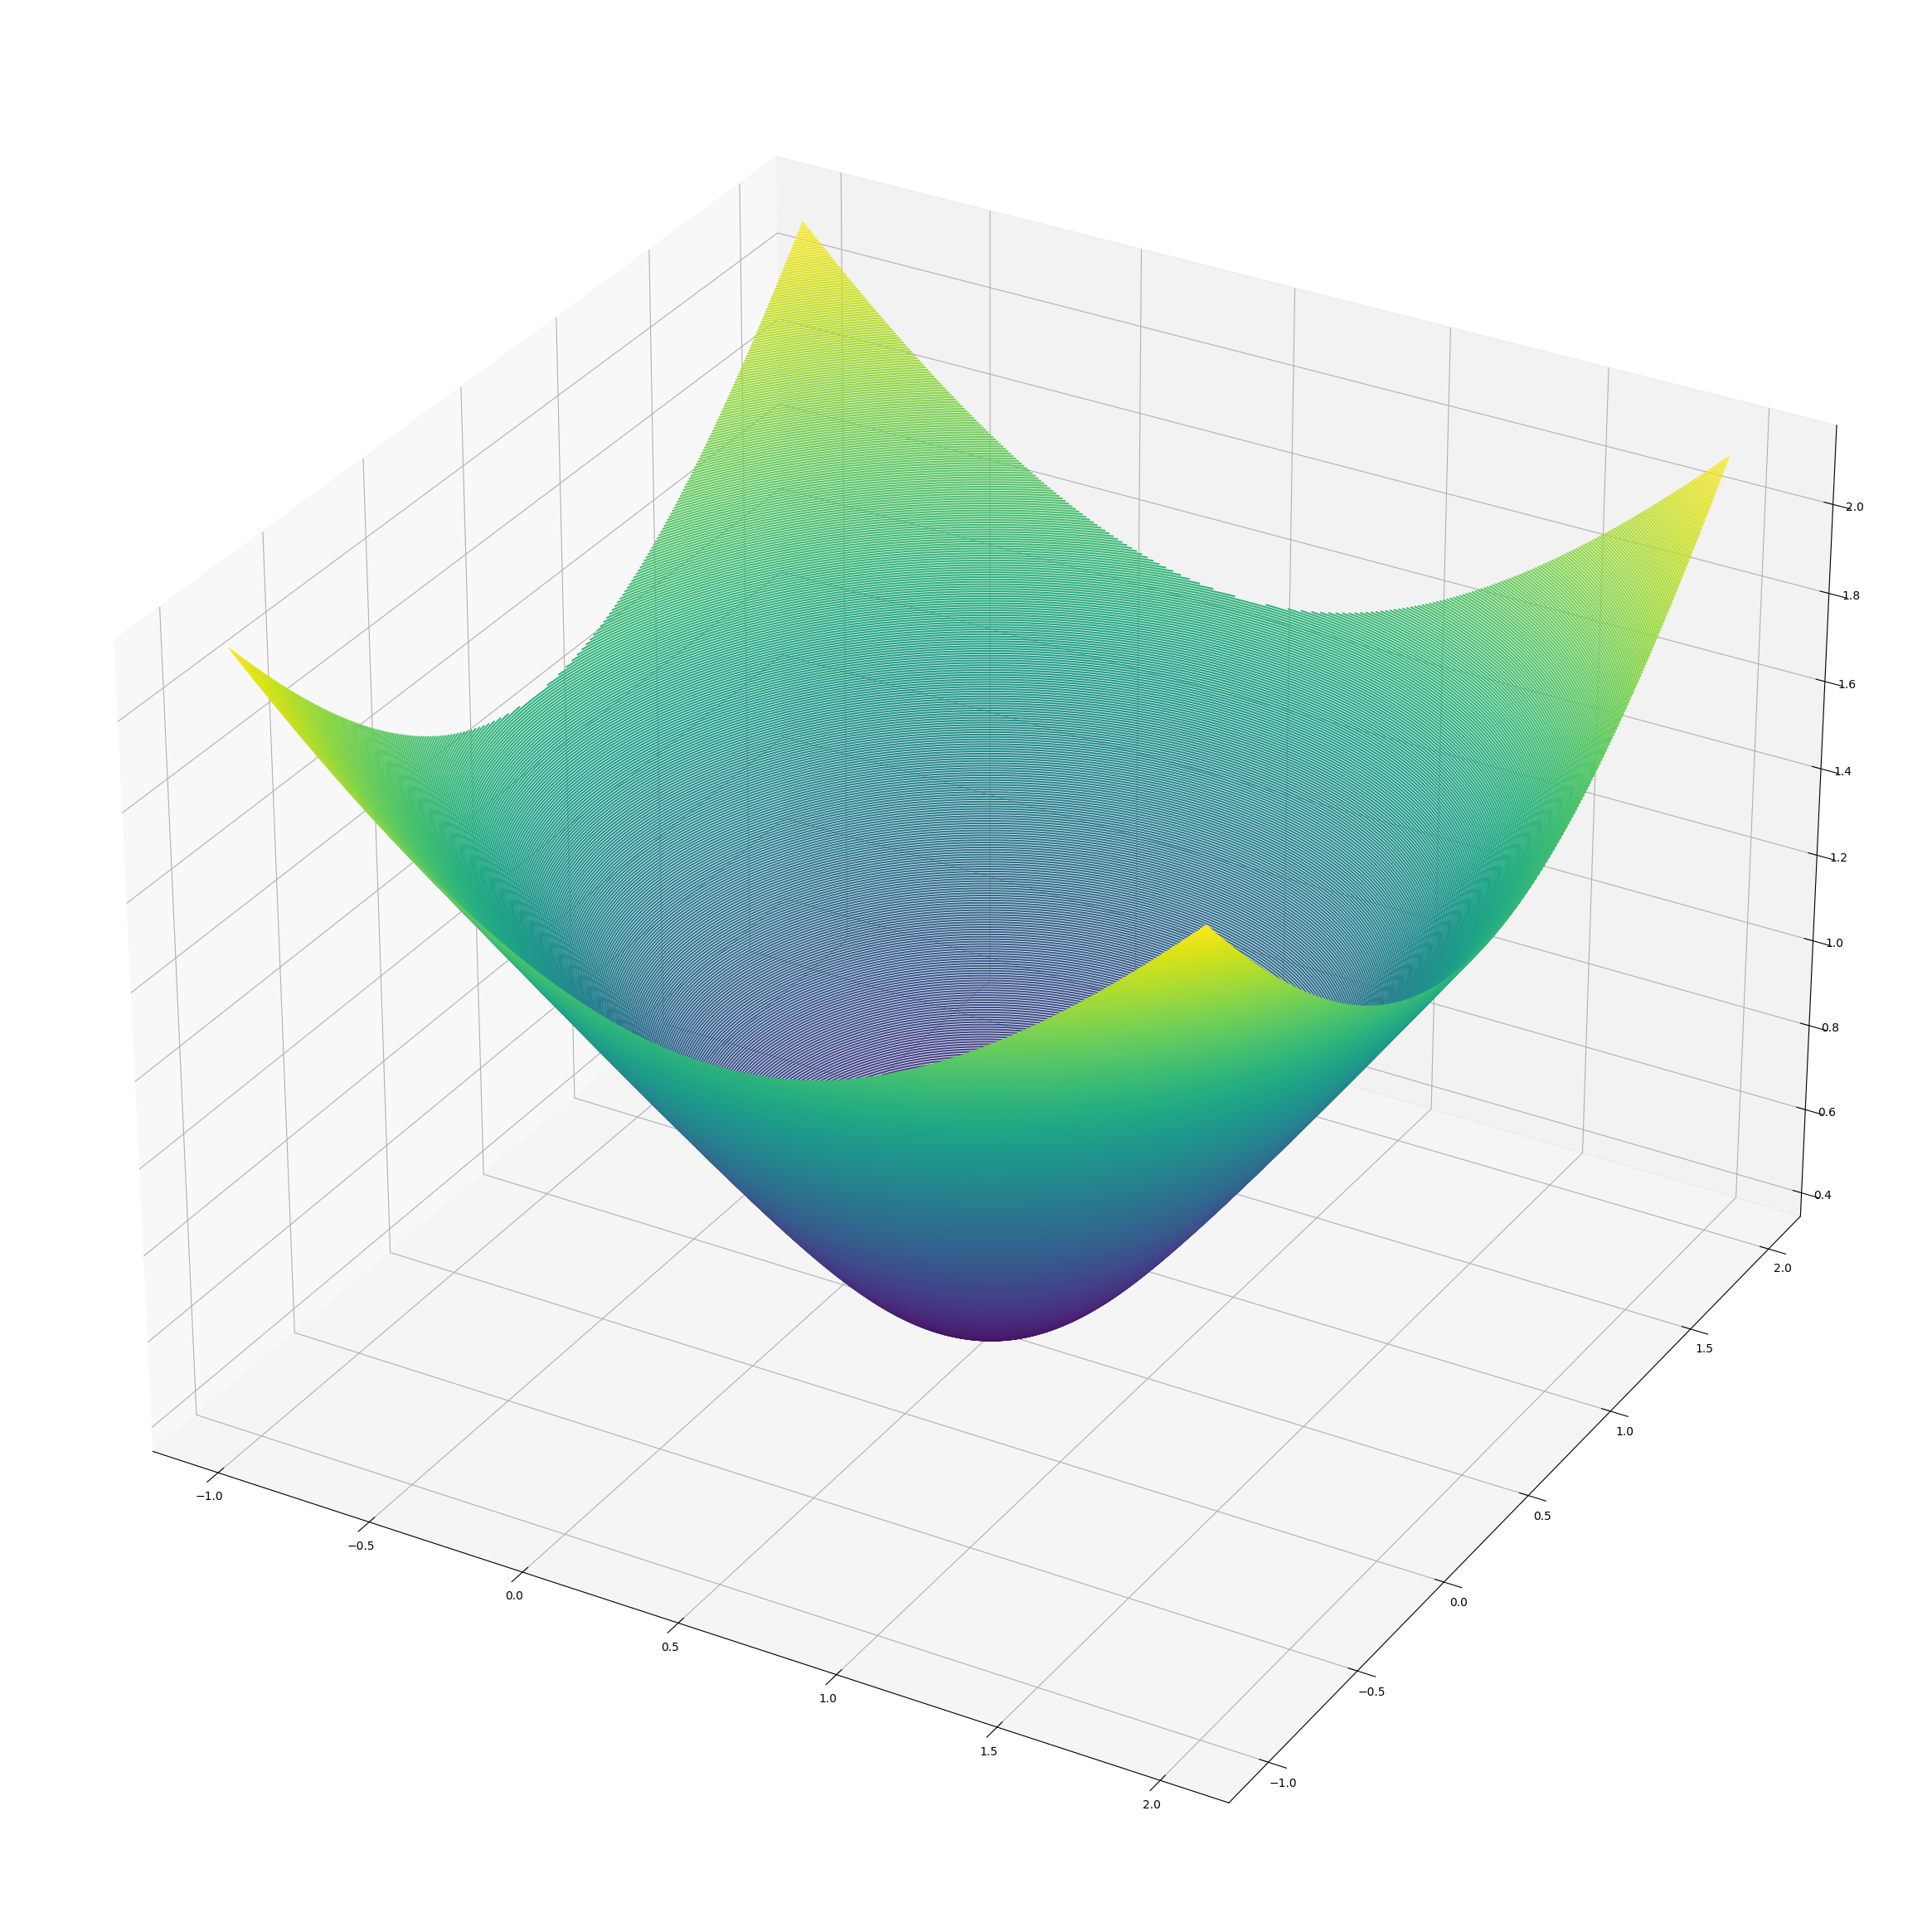

In [6]:
fig = figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.contour(x_axis_mesh,y_axis_mesh, loss_mesh_z_axis, levels = 500)
# ax.view_init(elev=45)
fig.show()

In [7]:
import numpy as np
loss_np_arr =np.array(loss_mesh_z_axis) # still needs interpolation from 300x300 to 1000x1000, but it was pretty close
ind = np.unravel_index(np.argmin(loss_np_arr, axis=None), loss_np_arr.shape)
print(list_x[ind[1]],list_y[ind[0]])


0.6640184449726233 0.44639156205223074


# Numerical Conceptualization of Derivatives

it comes for the main definition of the derivative 

$\frac{\partial \mathbb{L}}{ \partial \mathbb{x}}   = \lim_{h \to 0} \frac{\mathbb{L}(x+h) -\mathbb{L} (x)} {h} $

By replacing the asymptotically infintesimal by pragmatically small of value, we can get a definition of derivative that can be numerically computed

# Optimization Loop

C:\Users\nouran\AppData\Local\Temp\ipykernel_8836\2606029487.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


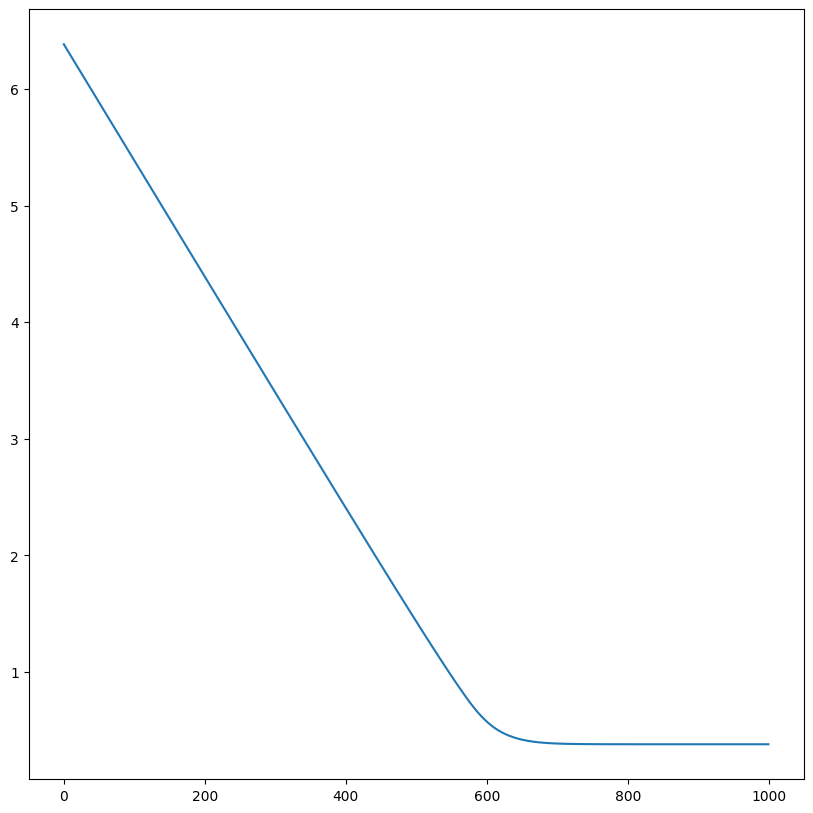

In [8]:
x_p, y_p = 5,5
EPOCHS = 1000
DELTA = 0.01
H = 0.001

epoch_losses = []


for i in range (EPOCHS):
    epoch_losses.append(loss_at_one_point(x_p, y_p, list_x, list_y))
    dloss_dx = (loss_at_one_point(x_p + H, y_p, list_x, list_y) - loss_at_one_point(x_p, y_p, list_x, list_y))/H
    dloss_dy = (loss_at_one_point(x_p , y_p + H, list_x, list_y) - loss_at_one_point(x_p , y_p , list_x, list_y))/H
    x_p -= DELTA * dloss_dx
    y_p -= DELTA * dloss_dy

fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(epoch_losses)
fig.show()


In [9]:
print(x_p, y_p)

0.48310117980540024 0.49034659176375284


## Closed Form Evaluation

The derivative can be also calculated in a closed form solution.

$\frac{\partial \mathbb{L}}{\partial x_p} = -\frac{1}{N} \sum_{i=0}^{N-1}((x_i - x_p)^2 + (y_i - y_p)^2)^\frac{-1}{2}(x_i - x_p)$
<br>
$\frac{\partial \mathbb{L}}{\partial y_p} = -\frac{1}{N} \sum_{i=0}^{N-1}((x_i - x_p)^2 + (y_i - y_p)^2)^\frac{-1}{2}(y_i - y_p)$

Note that this approach will turn to enable more efficient solution as we do backpropagation.

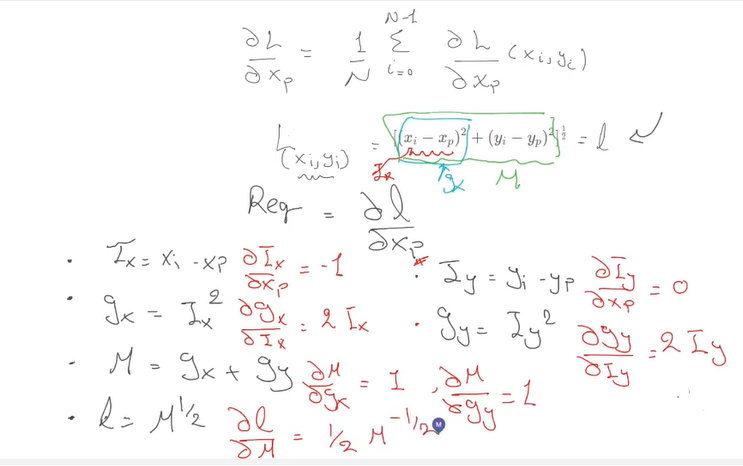

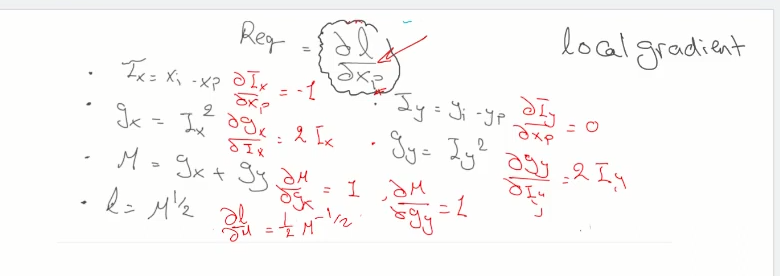

## Its Computational Graph

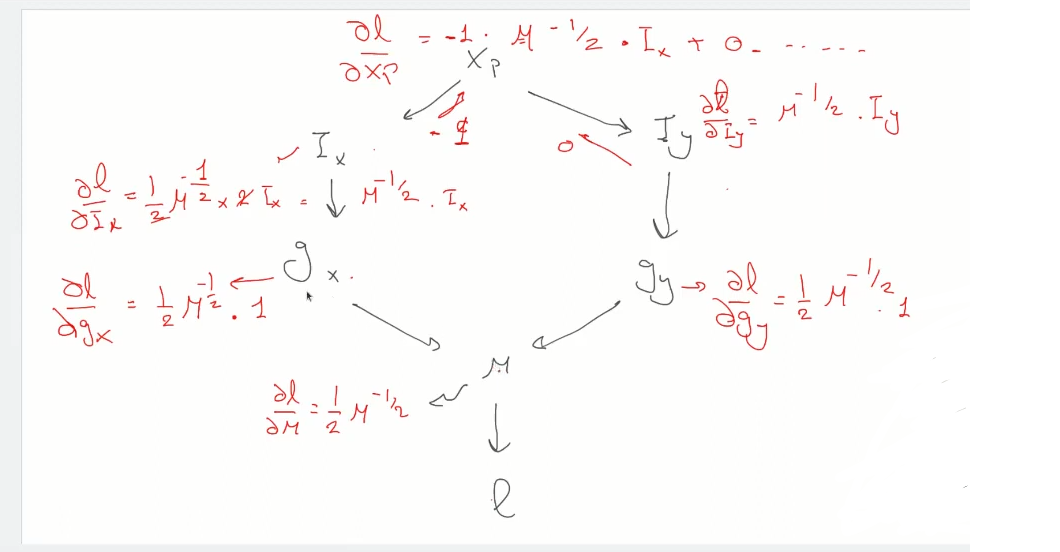

In [10]:
def calc_grad(x_p, y_p, list_x, list_y):
    sum_x, sum_y = 0,0
    for x_i, y_i in zip(list_x, list_y):
        sqrt_inv = ((x_i - x_p)**2 + (y_i-y_p)**2)**(-0.5)
        sum_x += sqrt_inv * (x_i - x_p)
        sum_y += sqrt_inv * (y_i - y_p)
    N = len(list_x)
    return - sum_x/N, - sum_y/N

x_random_point,y_random_point = 5,5
H = 0.1
dloss_dx = (loss_at_one_point(x_random_point + H, y_random_point, list_x, list_y) - loss_at_one_point(x_random_point, y_random_point, list_x, list_y))/H
dloss_dy = (loss_at_one_point(x_random_point , y_random_point + H, list_x, list_y) - loss_at_one_point(x_random_point , y_random_point , list_x, list_y))/H

print(f"Closed Form (dL/d{x_random_point},dL/d{y_random_point}  {calc_grad(x_random_point, y_random_point, list_x, list_y)}")
print(f"Original definition (using limits, H = {H}), {dloss_dx}, {dloss_dy}")


Closed Form (dL/d5,dL/d5  (0.7063740168102004, 0.7063243377191615)
Original definition (using limits, H = 0.1), 0.710255430342901, 0.7102054486709086


Note what happens when we decrease the value of H and change the value of random points

In [11]:
x_random_point,y_random_point = 5,5
H = 0.001
dloss_dx = (loss_at_one_point(x_random_point + H, y_random_point, list_x, list_y) - loss_at_one_point(x_random_point, y_random_point, list_x, list_y))/H
dloss_dy = (loss_at_one_point(x_random_point , y_random_point + H, list_x, list_y) - loss_at_one_point(x_random_point , y_random_point , list_x, list_y))/H

print(f"Closed Form (dL/d x+{x_random_point},dL/d{y_random_point}  {calc_grad(x_random_point, y_random_point, list_x, list_y)}")
print(f"Original definition (using limits, H = {H}), {dloss_dx}, {dloss_dy}")

Closed Form (dL/d x+5,dL/d5  (0.7063740168102004, 0.7063243377191615)
Original definition (using limits, H = 0.001), 0.706413257168137, 0.7063635749888775


In [12]:
x_random_point,y_random_point = 0.1,0.1
H = 0.001
dloss_dx = (loss_at_one_point(x_random_point + H, y_random_point, list_x, list_y) - loss_at_one_point(x_random_point, y_random_point, list_x, list_y))/H
dloss_dy = (loss_at_one_point(x_random_point , y_random_point + H, list_x, list_y) - loss_at_one_point(x_random_point , y_random_point , list_x, list_y))/H

print(f"Closed Form (dL/d x+{x_random_point},dL/d{y_random_point}  {calc_grad(x_random_point, y_random_point, list_x, list_y)}")
print(f"Original definition (using limits, H = {H}), {dloss_dx}, {dloss_dy}")

Closed Form (dL/d x+0.1,dL/d0.1  (-0.5785872613996171, -0.592414053799522)
Original definition (using limits, H = 0.001), -0.5779744852683066, -0.5917540367088581


In [13]:
x_random_point,y_random_point = 0.5,0.5
H = 0.001
dloss_dx = (loss_at_one_point(x_random_point + H, y_random_point, list_x, list_y) - loss_at_one_point(x_random_point, y_random_point, list_x, list_y))/H
dloss_dy = (loss_at_one_point(x_random_point , y_random_point + H, list_x, list_y) - loss_at_one_point(x_random_point , y_random_point , list_x, list_y))/H

print(f"Closed Form (dL/d x+{x_random_point},dL/d{y_random_point}  {calc_grad(x_random_point, y_random_point, list_x, list_y)}")
print(f"Original definition (using limits, H = {H}), {dloss_dx}, {dloss_dy}")

Closed Form (dL/d x+0.5,dL/d0.5  (0.02828649742364953, 0.016598934616586503)
Original definition (using limits, H = 0.001), 0.029924870705910767, 0.017766932258744816


# Finding the optimal point using pytorch

Find a point in $R^{2}$ with the least average Euclidean distance to a set of arbitary points

In [14]:
from torch import(
    tensor,
    sum as torch_sum,
    rand,
    no_grad
)
from torch.random import manual_seed

In [15]:
N = 1000
gen = manual_seed(5)
data = rand(size = (N,2), generator = gen)

In [16]:
print(type(data), data.shape, data[0, :])

<class 'torch.Tensor'> torch.Size([1000, 2]) tensor([0.8303, 0.1261])


## Optimization Loop

In [17]:
loss = lambda pnt : torch_sum(torch_sum((data-pnt)**2, dim = 1)**.5)
pnt = tensor((5., 5.)) #initialization
pnt.requires_grad = True
DELTA = 0.001
for _ in range (1000):
    curr_loss = loss(pnt)
    curr_loss.backward() # backward propagation of the gradient
    with no_grad(): 
        pnt -= DELTA * pnt.grad.data
        pnt.grad.zero_()
print(pnt)

tensor([0.4627, 0.4744], requires_grad=True)
